In [ ]:
!git clone https://github.com/mindee/doctr.git

Cloning into 'doctr'...
remote: Enumerating objects: 47369, done.
remote: Counting objects: 100% (8821/8821), done.
remote: Compressing objects: 100% (1963/1963), done.
remote: Total 47369 (delta 6238), reused 8534 (delta 6051), pack-reused 38548
Receiving objects: 100% (47369/47369), 51.95 MiB | 21.19 MiB/s, done.
Resolving deltas: 100% (33120/33120), done.


In [ ]:
!pip install -q tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 6.0 MB/s eta 0:00:00


In [ ]:
!pip install -qe doctr/.

  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 25.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.6/267.6 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.1 MB/s

In [ ]:
!pip install tf2onnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.7/454.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 46.1 MB/s eta 0:00:00


In [ ]:
from doctr.io import DocumentFile
from doctr.models import ocr_predictor

In [ ]:
model = ocr_predictor(pretrained=True)

  0%|          | 0/94178964 [00:00<?, ?it/s]

  0%|          | 0/58758994 [00:00<?, ?it/s]

In [ ]:
invoice = DocumentFile.from_pdf("/content/BE PACK-20230162_DMT-050374.pdf")

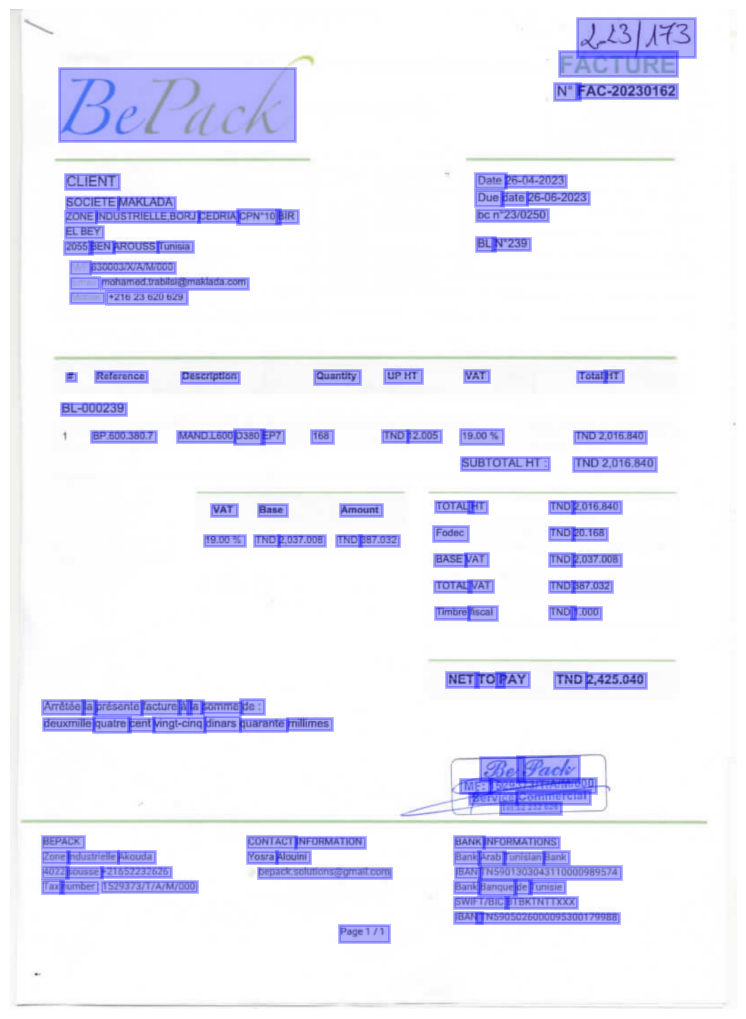

In [ ]:
result = model(invoice)
result.show(invoice)

In [ ]:
json_response = result.export()
json_response

{'pages': [{'page_idx': 0,
   'dimensions': (1684, 1224),
   'orientation': {'value': None, 'confidence': None},
   'language': {'value': None, 'confidence': None},
   'blocks': [{'geometry': ((0.7485606872957516, 0.0087890625),
      (0.942034952001634, 0.0908203125)),
     'lines': [{'geometry': ((0.7794628267973855, 0.0087890625),
        (0.942034952001634, 0.0478515625)),
       'words': [{'value': 'd131173',
         'confidence': 0.0546971932053566,
         'geometry': ((0.7794628267973855, 0.0087890625),
          (0.942034952001634, 0.0478515625))}]},
      {'geometry': ((0.7552785437091503, 0.0419921875),
        (0.9178506689133987, 0.06640625)),
       'words': [{'value': 'FACTURE',
         'confidence': 0.9955458045005798,
         'geometry': ((0.7552785437091503, 0.0419921875),
          (0.9178506689133987, 0.06640625))}]},
      {'geometry': ((0.7485606872957516, 0.0732421875),
        (0.9178506689133987, 0.0908203125)),
       'words': [{'value': 'N"',
         'co

In [ ]:
values = []
for page in json_response['pages']:
    for block in page['blocks']:
        for line in block['lines']:
            for word in line['words']:
                values.append(word['value'])
# Display values in column-like format
for value in values:
    print(value)

d131173
FACTURE
N"
FAC-20230162
BePack
CLIENT
SOCIETE
MAKLADA
ELBEY
2055
BEN
AROUSS
Tunisia
ME
8300031XAM000
Emailr
mohamed.trabiliggmaklada.com
Mcoite
+21623620629
Date
26-04-2023
Due
date
26-06-2023
bcn'23/0250
BL
N"239
ZONE
INDUSTRIELLEBORJ
CEDRIA
CPN'10
BIR
#
Referance
BL-000239
Description
Quantity
UPHT
VAT
Total
HT
BP.600.380.7
MAND.L600
D380
EP7
168
TND
12.005
19.00%
TND2,016.840
SUBTOTALHT:
TND2,016.840
VAT
Base
Amount
TOTALI
HT
Fodec
BASE
VAT
TOTAL
VAT
Timbre
fiscal
TND:
2,016.840
TND:
20.168
TND
2,037.008
TND:
387.032
TND
1.000
19.00%
TND
2,037.008
TND:
387.032
NET
TO
PAY
TND
2,425.040
Arrêtée
la
présenta
facture
à
la
somme
de:
deuxmille
quatre
cent
vingt-cing
dinars
quarante
millimes
e
Pach
MF:
1920473FFA1#000
purvice.
Commercial
Tet12212626
BANK
INFORMATIONS
Bank
Arab
Tunisian
Bank
IBAN
T169013020031000989974
Bank
Banque
de
Tunisie
SWIFT/BICI
BTBKTNTTXXX
IBANT
TN5905026000095300179988
BEPACK
Zone
industrielle
Akouda
4022
sousse
+21652232626
Tax
number:
1529373/1/A/M/000
CON

In [ ]:
# ... your existing code ...

# Extracted text formatting
formatted_text = ""
for page in json_response['pages']:
    for block in page['blocks']:
        for line in block['lines']:
            for word in line['words']:
                formatted_text += word['value'] + " "
            formatted_text += "\n"
        formatted_text += "\n"

# Display formatted text
print(formatted_text)

d131173 
FACTURE 
N" FAC-20230162 

BePack 

CLIENT 
SOCIETE MAKLADA 
ELBEY 
2055 BEN AROUSS Tunisia 
ME 8300031XAM000 
Emailr mohamed.trabiliggmaklada.com 
Mcoite +21623620629 

Date 26-04-2023 
Due date 26-06-2023 
bcn'23/0250 
BL N"239 

ZONE INDUSTRIELLEBORJ CEDRIA CPN'10 BIR 

# Referance 
BL-000239 

Description 

Quantity UPHT 

VAT 

Total HT 

BP.600.380.7 MAND.L600 D380 EP7 

168 

TND 12.005 19.00% 

TND2,016.840 

SUBTOTALHT: TND2,016.840 

VAT Base 

Amount 

TOTALI HT 
Fodec 
BASE VAT 
TOTAL VAT 
Timbre fiscal 

TND: 2,016.840 
TND: 20.168 
TND 2,037.008 
TND: 387.032 
TND 1.000 

19.00% TND 2,037.008 TND: 387.032 

NET TO PAY TND 2,425.040 

Arrêtée la présenta facture à la somme de: 
deuxmille quatre cent vingt-cing dinars quarante millimes 

e Pach 
MF: 1920473FFA1#000 
purvice. Commercial 
Tet12212626 
BANK INFORMATIONS 
Bank Arab Tunisian Bank 
IBAN T169013020031000989974 
Bank Banque de Tunisie 
SWIFT/BICI BTBKTNTTXXX 
IBANT TN5905026000095300179988 

BEPACK 
Zone i

In [ ]:
# ... your existing code ...

# Extracted text formatting
formatted_text = ""
for page in json_response['pages']:
    for block in page['blocks']:
        for line in block['lines']:
            for word in line['words']:
                formatted_text += word['value'] + " "

# Display formatted text
print(formatted_text)

d131173 FACTURE N" FAC-20230162 BePack CLIENT SOCIETE MAKLADA ELBEY 2055 BEN AROUSS Tunisia ME 8300031XAM000 Emailr mohamed.trabiliggmaklada.com Mcoite +21623620629 Date 26-04-2023 Due date 26-06-2023 bcn'23/0250 BL N"239 ZONE INDUSTRIELLEBORJ CEDRIA CPN'10 BIR # Referance BL-000239 Description Quantity UPHT VAT Total HT BP.600.380.7 MAND.L600 D380 EP7 168 TND 12.005 19.00% TND2,016.840 SUBTOTALHT: TND2,016.840 VAT Base Amount TOTALI HT Fodec BASE VAT TOTAL VAT Timbre fiscal TND: 2,016.840 TND: 20.168 TND 2,037.008 TND: 387.032 TND 1.000 19.00% TND 2,037.008 TND: 387.032 NET TO PAY TND 2,425.040 Arrêtée la présenta facture à la somme de: deuxmille quatre cent vingt-cing dinars quarante millimes e Pach MF: 1920473FFA1#000 purvice. Commercial Tet12212626 BANK INFORMATIONS Bank Arab Tunisian Bank IBAN T169013020031000989974 Bank Banque de Tunisie SWIFT/BICI BTBKTNTTXXX IBANT TN5905026000095300179988 BEPACK Zone industrielle Akouda 4022 sousse +21652232626 Tax number: 1529373/1/A/M/000 CON

In [ ]:
import zipfile

# Specify the path to the zip file you want to unzip
zip_file_path = '/content/custom_ner_model.zip'  # Replace with your zip file path

# Specify the directory where you want to extract the contents
extracted_dir_path = '/content/custom_ner_model'  # Replace with your desired extraction path

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

In [ ]:
import spacy

# Replace 'path_to_your_downloaded_model' with the actual path to your downloaded model
model_path = '/content/custom_ner_model'

nlp_ner = spacy.load(model_path)

In [ ]:
text = formatted_text

# Process the text with the loaded NER model
doc = nlp_ner(text)

# Extract named entities from the processed text
entities = [(ent.text, ent.label_) for ent in doc.ents]

# Print the extracted entities
print(entities)

[('FAC-20230162', 'NUMÉRO FACTURE'), ('BePack', 'NOM DE FOURNISSEUR'), ('SOCIETE MAKLADA', 'NOM DE LA SOCIETÉ'), ('8300031XAM000', 'MATRICULE FISCAL SOCIÉTÉ'), ('26-06-2023', 'DATE FACTURE'), ("bcn'23/0250", ' NUMÉRO DE LA COMMANDE'), ('BL N"239', 'NUMÉRO BON DE LIVRAISON'), ('20.168', 'FODEC'), ('387.032', 'MONTANT TVA'), ('1.000', 'TIMBRE FISCAL'), ('2,425.040', 'MONTANT TOTAL'), ('deuxmille quatre cent vingt-cing dinars quarante millimes', 'MONTANT TOTAL EN LETTTRE ')]


In [ ]:
import csv

# Define the path for the CSV file where you want to save the entities
csv_file_path = '/content/extracted_entities.csv'  # Replace with your desired file path

# Write the extracted entities to a CSV file
with open(csv_file_path, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    # Write header row
    csv_writer.writerow(['Entity', 'Label'])
    # Write extracted entities
    for entity, label in entities:
        csv_writer.writerow([entity, label])

print(f"Extracted entities saved to {csv_file_path}")


Extracted entities saved to /content/extracted_entities.csv


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------